# <font color='#FFE15D'>**Week 6: Color Space**</font> 🔴🟢🔵

## <span style="font-size: 0.9em;">🟥</span> **Import**


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pygame

pygame 2.5.2 (SDL 2.28.2, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
cv2.__version__

'4.6.0'

## <span style="font-size: 0.9em;">🟥</span> **Section 1: Color Spaces**

In [6]:
cv2.cvtColor?

Docstring:
cvtColor(src, code[, dst[, dstCn]]) -> dst
.   @brief Converts an image from one color space to another.
.   
.   The function converts an input image from one color space to another. In case of a transformation
.   to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note
.   that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the
.   bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue
.   component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and
.   sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.
.   
.   The conventional ranges for R, G, and B channel values are:
.   -   0 to 255 for CV_8U images
.   -   0 to 65535 for CV_16U images
.   -   0 to 1 for CV_32F images
.   
.   In case of linear transformations, the range does not matter. But in case of a non-linear
.   transfo

In [ ]:
cv2.COLOR_BGR2

In [7]:
img = cv2.imread("data/color_spaces.png")
img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)

cv2.imshow("Original Image", img)
cv2.waitKey()
cv2.destroyAllWindows()

#### <span style="font-size: 0.9em;">🟨</span> **BGR2RGB**

In [12]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img[..., ::-1]

cv2.imshow("Original Image", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
cv2.imshow("Original Image", img[..., ::-1])
cv2.waitKey()
cv2.destroyAllWindows()

#### <span style="font-size: 0.9em;">🟨</span> **BGR2GRAY**

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Original Image 1", gray)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2.imshow("Original Image 2", gray)

cv2.waitKey()
cv2.destroyAllWindows()

#### <span style="font-size: 0.9em;">🟨</span> **BGR2BGRA**

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
img.shape

(340, 450, 4)

#### <span style="font-size: 0.9em;">🟨</span> **BGR2CMYK**

In [ ]:
bgr = cv2.imread("data/color_spaces.png")
bgr = cv2.normalize(bgr, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)
cv2.imshow("Original Image", rgb)

cmyk = cv2.cvtColor(bgr, cv2.COLOR_BGR2C)
cv2.imshow("Original Image", cmyk)

cv2.waitKey()
cv2.destroyAllWindows()

In [28]:
bgr = cv2.imread("data/color_spaces.png")
bgr = cv2.normalize(bgr, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)
cv2.imshow("Original Image", bgr)

cmy = 1 - bgr
cv2.imshow("CMY Image", cmy)

cv2.waitKey()
cv2.destroyAllWindows()

OpenCV does not have a direct function to convert BGR to CMYK because the CMYK color model is primarily used in the printing industry, and it is a subtractive color model, unlike the additive RGB model. OpenCV is primarily designed for computer vision tasks and image processing in digital displays, where RGB and other related color spaces (like HSV, Lab, etc.) are more commonly used.

However, you can convert an RGB image to CMYK using a custom function. Here's a sample code to demonstrate how you can achieve this conversion:

```python
import cv2
import numpy as np

def bgr_to_cmyk(bgr_image):
    # Normalize the BGR values to the range 0-1
    bgr_image = bgr_image.astype(float) / 255.0
    
    # Extract B, G, and R channels
    B = bgr_image[:, :, 0]
    G = bgr_image[:, :, 1]
    R = bgr_image[:, :, 2]
    
    # Calculate K (Black) channel
    K = 1 - np.max(bgr_image, axis=2)
    
    # Avoid division by zero
    C = (1 - R - K) / (1 - K + 1e-10)
    M = (1 - G - K) / (1 - K + 1e-10)
    Y = (1 - B - K) / (1 - K + 1e-10)
    
    # Stack channels to get the CMYK image
    CMYK = (np.dstack((C, M, Y, K)) * 255).astype(np.uint8)
    
    return CMYK

# Load the image
img = cv2.imread('data/color_spaces.png')

# Convert BGR to CMYK
cmyk_image = bgr_to_cmyk(img)

# Display the original and CMYK images
cv2.imshow('Original BGR Image', img)
cv2.imshow('CMYK Image', cmyk_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

##### Explanation:
1. **Normalization**: The BGR values are normalized to the range 0-1.
2. **Extract Channels**: The B, G, and R channels are extracted.
3. **Calculate K (Black) Channel**: K is calculated as \( K = 1 - \max(R, G, B) \).
4. **Calculate C, M, Y Channels**: The C, M, and Y channels are calculated using the formulas:
   \[
   C = \frac{1 - R - K}{1 - K}
   \]
   \[
   M = \frac{1 - G - K}{1 - K}
   \]
   \[
   Y = \frac{1 - B - K}{1 - K}
   \]
5. **Avoid Division by Zero**: A small value (`1e-10`) is added to avoid division by zero.
6. **Stack Channels**: The C, M, Y, and K channels are stacked together to form the CMYK image.
7. **Display Images**: The original BGR and converted CMYK images are displayed.

This custom function allows you to convert a BGR image to the CMYK color model, even though OpenCV does not provide a direct function for this conversion.

In [29]:
def bgr_to_cmyk(bgr_image):
    # Normalize the BGR values to the range 0-1
    bgr_image = bgr_image.astype(float) / 255.0
    
    # Extract B, G, and R channels
    B = bgr_image[:, :, 0]
    G = bgr_image[:, :, 1]
    R = bgr_image[:, :, 2]
    # B, G, R = cv2.split(bgr_image)
    
    # Calculate K (Black) channel
    K = 1 - np.max(bgr_image, axis=2)
    # K = np.min(1-bgr_image, axis=2)
    
    # Avoid division by zero
    C = (1 - R - K) / (1 - K + 1e-10)
    M = (1 - G - K) / (1 - K + 1e-10)
    Y = (1 - B - K) / (1 - K + 1e-10)
    
    # Stack channels to get the CMYK image
    CMYK = (np.dstack((C, M, Y, K)) * 255).astype(np.uint8)
    # cmyk = cv2.merge((C, M, Y, K))
    
    return CMYK

# Load the image
img = cv2.imread('data/color_spaces.png')

# Convert BGR to CMYK
cmyk_image = bgr_to_cmyk(img)
print(cmyk_image.shape)

# Display the original and CMYK images
cv2.imshow('Original BGR Image', img)
cv2.imshow('CMYK Image', cmyk_image)
cv2.waitKey()
cv2.destroyAllWindows()


(340, 450, 4)


#### <span style="font-size: 0.9em;">🟨</span> **BGR2HSV**

In [49]:
bgr = cv2.imread("data/color_spaces.png")
# bgr = cv2.normalize(bgr, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)
cv2.imshow("Original Image", bgr)

hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV Image", hsv)

cv2.waitKey()
cv2.destroyAllWindows()

In [50]:
h, s, v = cv2.split(hsv)

In [52]:
h.dtype, s.dtype, v.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [53]:
h.min(), h.max(), s.min(), s.max(), v.min(), v.max()

(0, 150, 0, 255, 0, 255)

In [68]:
bgr = cv2.imread("data/color_spaces.png")
bgr = cv2.normalize(bgr, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)
cv2.imshow("Original Image", bgr)

hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV_FULL)

h, s, v = cv2.split(hsv)

cv2.imshow("Hue", h/360)
cv2.imshow("Saturation", s)
cv2.imshow("Vue", v)

cv2.waitKey()
cv2.destroyAllWindows()

In [65]:
h.max(), (300/360)*255

(300.0, 212.5)

#### <span style="font-size: 0.9em;">🟨</span> **BGR2LAB**

In [82]:
cv2.COLOR_BGR2LAB, cv2.COLOR_BGR2Lab

(44, 44)

In [81]:
bgr = cv2.imread("data/color_spaces.png")
bgr = cv2.normalize(bgr, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)
cv2.imshow("Original Image", bgr)

lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2Lab)

l, a, b = cv2.split(lab)
print(l.min(), l.max(), a.min(), a.max(), b.min(), b.max())

cv2.imshow("L*", l)
cv2.imshow("a*", a)
cv2.imshow("b*", b)

cv2.waitKey()
cv2.destroyAllWindows()

0.0 100.0 -86.1875 98.234375 -107.859375 94.46875


#### <span style="font-size: 0.9em;">🟨</span> **BGR2YCbCr**

#### <span style="font-size: 0.9em;">🟨</span> **BGR2Luv**

### <span style="font-size: 0.9em;">🟧</span> **Manipulating Channels**

In [105]:
img = cv2.imread('data/color_spaces.png')
img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)
h = 360 - h
inverted_hsv = cv2.merge((h, s, v))
bgr = cv2.cvtColor(inverted_hsv, cv2.COLOR_HSV2BGR)

cv2.imshow('Original Image', img)
cv2.imshow('Hue Inverted Image', bgr)
cv2.waitKey()
cv2.destroyAllWindows()

In [106]:
img = cv2.imread('data/color_spaces.png')
img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC3)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)
h += 60
print(h.min(), h.max())
inverted_hsv = cv2.merge((h, s, v))
bgr = cv2.cvtColor(inverted_hsv, cv2.COLOR_HSV2BGR)

cv2.imshow('Original Image', img)
cv2.imshow('Hue Inverted Image', bgr)
cv2.waitKey()
cv2.destroyAllWindows()

60.0 360.0


#### <span style="font-size: 0.9em;">🟨</span> **Example: Thresholding**

In [6]:
def threshold_color_range(image_path, lower_color, upper_color):
    img = cv2.imread(image_path)
    
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Create a binary mask where the specified colors are white and the rest are black
    mask = cv2.inRange(hsv, lower_color, upper_color)
    
    # Apply the mask to the original image
    result = cv2.bitwise_and(img, img, mask=mask)
    
    # Convert images to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display the original image
    axs[0].imshow(img_rgb)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    # Display the mask
    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title('Mask')
    axs[1].axis('off')
    
    # Display the result
    axs[2].imshow(result_rgb)
    axs[2].set_title('Result')
    axs[2].axis('off')
    
    plt.show()

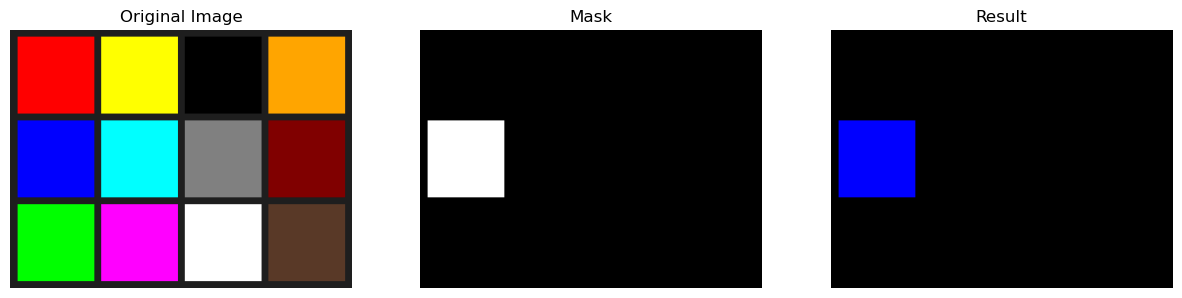

In [7]:
# Extract blue color
lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])
threshold_color_range('data/color_spaces.png', lower_blue, upper_blue)

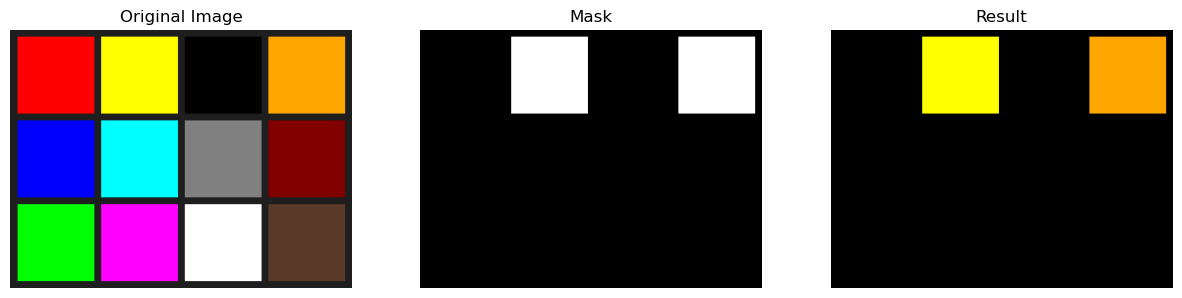

In [8]:
 # Extract yellow color
lower_yellow = np.array([10, 150, 50])
upper_yellow = np.array([40, 255, 255])
threshold_color_range('data/color_spaces.png', lower_yellow, upper_yellow)

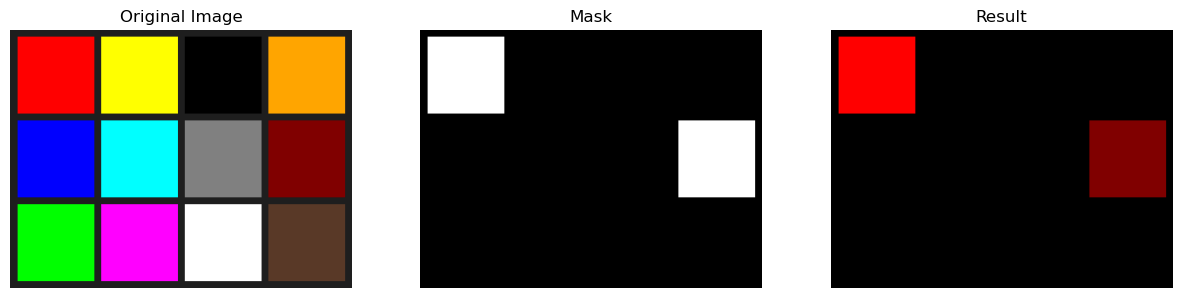

In [10]:
# Extract red color
lower_red = np.array([0, 20, 50])
upper_red = np.array([10, 255, 255])
threshold_color_range('data/color_spaces.png', lower_red, upper_red)

## <span style="font-size: 0.9em;">🟥</span> **Section 2: Mini Projects**

[Sample Code](https://www.youtube.com/watch?v=aFNDh5k3SjU)

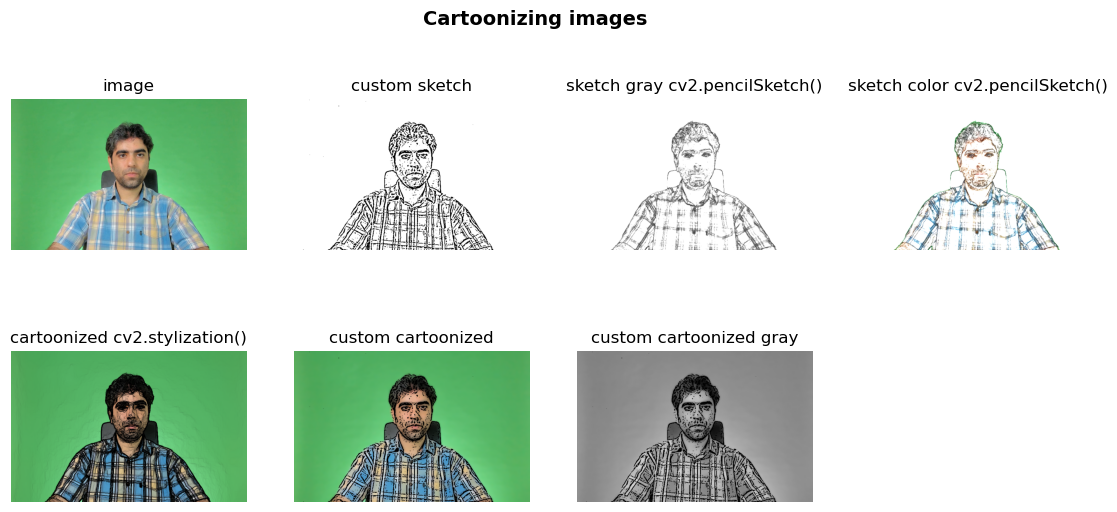

Please Also change color of the ball

#### <span style="font-size: 0.9em;">🟨</span> **Also change color of the ball**

In [300]:
# import cv2
# import numpy as np

# # Load the video
# cap = cv2.VideoCapture('data/bouncing_ball.mp4')  # Replace with the actual path to your downloaded video

# # Define the lower and upper boundaries of the ball color in HSV
# # These values might need to be adjusted depending on the color of the ball
# lower_color = np.array([160, 250, 150])  # Adjust based on the color of the ball in the video
# upper_color = np.array([180, 255, 255])  # Adjust based on the color of the ball in the video

# frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# # Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'mp4v' for MP4
# out = cv2.VideoWriter('data/tracking_ball.mp4', fourcc, 20.0, (frame_width, frame_height))

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Convert the frame to HSV color space
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     # Create a mask for the color of the ball
#     mask = cv2.inRange(hsv, lower_color, upper_color)
    
#     img_alpha = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA)
#     img_alpha[..., -1] = mask.copy()

#     # Perform a series of dilations and erosions to remove any small blobs left in the mask
#     # mask = cv2.erode(mask, None, iterations=2)
#     # mask = cv2.dilate(mask, None, iterations=2)

#     # Bitwise-AND mask and original image
#     res = cv2.bitwise_and(frame, frame, mask=~img_alpha[..., -1])

#     # Find the bounding box of the non-zero pixels in the mask
#     non_zero_points = cv2.findNonZero(mask)
#     if non_zero_points is not None:
#         x, y, w, h = cv2.boundingRect(img_alpha[..., -1])

#         # Draw the rectangle on the original frame
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)
        
#         # Draw the rectangle on the result frame
#         cv2.rectangle(res, (x, y), (x + w, y + h), (0, 0, 255), 2)

#     # Show the original frame with the rectangle
#     out.write(frame)
#     cv2.imshow("Frame", frame)
    
#     # Show the result frame with the rectangle
    
#     cv2.imshow("Result", res)

#     # If the 'q' key is pressed, break from the loop
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the camera and close all windows
# cap.release()
# out.release()
# cv2.destroyAllWindows()

In [91]:
# import cv2
# import numpy as np

# # Load the video
# cap = cv2.VideoCapture('data/ball.mp4')  # Replace with the actual path to your downloaded video

# # Define the lower and upper boundaries of the ball color in HSV
# # These values might need to be adjusted depending on the color of the ball
# lower_color = np.array([170, 50, 50])  # Adjust based on the color of the ball in the video
# upper_color = np.array([180, 255, 255])  # Adjust based on the color of the ball in the video

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Convert the frame to HSV color space
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     # Create a mask for the color of the ball
#     mask = cv2.inRange(hsv, lower_color, upper_color)
   
#     mg_alpha = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA)
#     img_alpha[..., -1] = mask.copy()
#     # Perform a series of dilations and erosions to remove any small blobs left in the mask
#     # mask = cv2.erode(mask, None, iterations=2)
#     # mask = cv2.dilate(mask, None, iterations=2)

#     # Bitwise-AND mask and original image
#     res = cv2.bitwise_and(frame, frame, mask=~img_alpha[..., -1])

#     # Find all non-zero points in the mask
#     non_zero_points = cv2.findNonZero(mask)
#     if res is not None:
#         # Convert the points to a format that can be used with min and max functions
#         points = non_zero_points[:, 0, :]

#         # Calculate the minimum and maximum x and y coordinates
#         min_x = np.min(points[:, 0])
#         max_x = np.max(points[:, 0])
#         min_y = np.min(points[:, 1])
#         max_y = np.max(points[:, 1])

#         # Compute the width and height
#         x, y, w, h = min_x, min_y, max_x - min_x, max_y - min_y

#         # Draw the rectangle on the original frame with custom color and thickness
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)
        
#         # Draw the rectangle on the result frame with custom color and thickness
#     cv2.rectangle(res, (x, y), (x + w, y + h), (255, 0, 0), 3)

#     # Show the original frame with the rectangle
#     cv2.imshow("Frame", frame)
    
#     # Show the result frame with the rectangle
#     cv2.imshow("Result", res)

#     # If the 'q' key is pressed, break from the loop
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the camera and close all windows
# cap.release()
# cv2.destroyAllWindows()


In [284]:
# import cv2
# import numpy as np

# # Load the video
# cap = cv2.VideoCapture('data/bouncing_ball.mp4')  # Replace with the actual path to your downloaded video

# # Define the lower and upper boundaries of the ball color in HSV
# # These values might need to be adjusted depending on the color of the ball
# lower_color = np.array([175, 50, 50])  # Adjust based on the color of the ball in the video
# upper_color = np.array([180, 255, 255])  # Adjust based on the color of the ball in the video

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Convert the frame to HSV color space
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     # Create a mask for the color of the ball
#     mask = cv2.inRange(hsv, lower_color, upper_color)
   
#     img_alpha = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA)
#     img_alpha[..., -1] = mask.copy()
#     # Perform a series of dilations and erosions to remove any small blobs left in the mask
#     # mask = cv2.erode(mask, None, iterations=2)
#     # mask = cv2.dilate(mask, None, iterations=2)

#     # Bitwise-AND mask and original image
#     res = cv2.bitwise_and(frame, frame, mask=~img_alpha[..., -1])

#     # Find all non-zero points in the mask
#     non_zero_points = cv2.findNonZero(~mask)
#     if res is not None:
#         # Convert the points to a format that can be used with min and max functions
#         points = non_zero_points[:, 0, :]

#         # Calculate the minimum and maximum x and y coordinates
#         min_x = np.min(points[:, 0])
#         max_x = np.max(points[:, 0])
#         min_y = np.min(points[:, 1])
#         max_y = np.max(points[:, 1])

#         # Compute the width and height
#         x, y, w, h = min_x, min_y, max_x - min_x, max_y - min_y

#         # Draw the rectangle on the original frame with custom color and thickness
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)
        
#         # Draw the rectangle on the result frame with custom color and thickness
#         cv2.rectangle(res, (x, y), (x + w, y + h), (255, 0, 0), 3)

#     # Show the original frame with the rectangle
#     cv2.imshow("Frame", frame)
    
#     # Show the result frame with the rectangle
#     cv2.imshow("Result", res)
    

#     # If the 'q' key is pressed, break from the loop
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the camera and close all windows
# video_writer.release() 
# cv2.destroyAllWindows()


In [31]:
# import cv2
# import numpy as np

# # Load the video
# cap = cv2.VideoCapture('data/bouncing_ball.mp4')  # Replace with the actual path to your downloaded video

# # Define the lower and upper boundaries of the ball color in HSV
# # These values might need to be adjusted depending on the color of the ball
# lower_color = np.array([160, 50, 50])  # Adjust based on the color of the ball in the video
# upper_color = np.array([180, 255, 255])  # Adjust based on the color of the ball in the video

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Convert the frame to HSV color space
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     # Create a mask for the color of the ball
#     mask = cv2.inRange(hsv, lower_color, upper_color)

#     # Perform a series of dilations and erosions to remove any small blobs left in the mask
#     # mask = cv2.erode(mask, None, iterations=2)
#     # mask = cv2.dilate(mask, None, iterations=2)

#     # Bitwise-AND mask and original image
#     res = cv2.bitwise_and(frame, frame, mask=mask)

#     # Find all non-zero points in the mask
#     non_zero_points = cv2.findNonZero(mask)
#     if non_zero_points is not None:
#         # Convert the points to a format that can be used with min and max functions
#         points = non_zero_points[:, 0, :]

#         # Calculate the minimum and maximum x and y coordinates
#         min_x = np.min(points[:, 0])
#         max_x = np.max(points[:, 0])
#         min_y = np.min(points[:, 1])
#         max_y = np.max(points[:, 1])

#         # Compute the width and height
#         x, y, w, h = min_x, min_y, max_x - min_x, max_y - min_y

#         # Draw the rectangle on the original frame with custom color and thickness
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)
        
#         # Draw the rectangle on the result frame with custom color and thickness
#         cv2.rectangle(res, (x, y), (x + w, y + h), (255, 0, 0), 3)

#     # Show the original frame with the rectangle
#     cv2.imshow("Frame", frame)
    
#     # Show the result frame with the rectangle
#     cv2.imshow("Result", res)

#     # If the 'q' key is pressed, break from the loop
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the camera and close all windows
# cap.release()
# cv2.destroyAllWindows()


In [76]:
# import cv2
# import numpy as np

# # Load the video
# cap = cv2.VideoCapture('data/bouncing_ball.mp4')  # Replace with the actual path to your downloaded video

# # Define the lower and upper boundaries of the ball color in HSV
# # These values might need to be adjusted depending on the color of the ball
# lower_color = np.array([170, 50, 50])  # Adjust based on the color of the ball in the video
# upper_color = np.array([180, 255, 255])  # Adjust based on the color of the ball in the video

# width, height = 640, 480
# video_file = "data/tracking_ball.mp4"  # Output video file name
# frame_rate = 30  # Frame rate (FPS)
# video_codec = cv2.VideoWriter_fourcc(*"mp4v")  # Video codec
# video_writer = cv2.VideoWriter(video_file, video_codec, frame_rate, (width, height))

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Convert the frame to HSV color space
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     # Create a mask for the color of the ball
#     mask = cv2.inRange(hsv, lower_color, upper_color)
    
#     img_alpha = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA)
#     img_alpha[..., -1] = mask.copy()

#     # Perform a series of dilations and erosions to remove any small blobs left in the mask
#     # mask = cv2.erode(mask, None, iterations=2)
#     # mask = cv2.dilate(mask, None, iterations=2)

#     # Bitwise-AND mask and original image
#     res = cv2.bitwise_and(frame, frame, mask=~img_alpha[..., -1])

#     # Find the bounding box of the non-zero pixels in the mask
#     non_zero_points = cv2.findNonZero(mask)
#     if non_zero_points is not None:
#         x, y, w, h = cv2.boundingRect(non_zero_points)

#         # Draw the rectangle on the original frame
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)
        
#         # Draw the rectangle on the result frame
#         cv2.rectangle(res, (x, y), (x + w, y + h), (0, 0, 255), 2)

#     # Show the original frame with the rectangle
#     cv2.imshow("Frame", frame)
    
    
#     # Show the result frame with the rectangle
#     cv2.imshow("Result", res)
    

#     # If the 'q' key is pressed, break from the loop
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the camera and close all windows
# # video_writer.release()
# cap.release()
# cv2.destroyAllWindows()

In [103]:
# import cv2
# import numpy as np

# # Load the video
# cap = cv2.VideoCapture('data/ball.mp4')  # Replace with the actual path to your downloaded video

# # Define the lower and upper boundaries of the ball color in HSV
# # These values might need to be adjusted depending on the color of the ball
# lower_color = np.array([160, 50, 50])  # Adjust based on the color of the ball in the video
# upper_color = np.array([180, 255, 255])  # Adjust based on the color of the ball in the video

# # Get the video frame width and height
# frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# # Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'mp4v' for MP4
# out = cv2.VideoWriter('data/tracking_ball.mp4', fourcc, 20.0, (frame_width, frame_height))

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Convert the frame to HSV color space
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     # Create a mask for the color of the ball
#     mask = cv2.inRange(hsv, lower_color, upper_color)

#     # Perform a series of dilations and erosions to remove any small blobs left in the mask
#     mask = cv2.erode(mask, None, iterations=2)
#     mask = cv2.dilate(mask, None, iterations=2)

#     # Bitwise-AND mask and original image
#     res = cv2.bitwise_and(frame, frame, mask=mask)

#     # Find all non-zero points in the mask
#     non_zero_points = cv2.findNonZero(mask)
#     if non_zero_points is not None:
#         # Convert the points to a format that can be used with min and max functions
#         points = non_zero_points[:, 0, :]

#         # Calculate the minimum and maximum x and y coordinates
#         min_x = np.min(points[:, 0])
#         max_x = np.max(points[:, 0])
#         min_y = np.min(points[:, 1])
#         max_y = np.max(points[:, 1])

#         # Compute the width and height
#         x, y, w, h = min_x, min_y, max_x - min_x, max_y - min_y

#         # Draw the rectangle on the original frame with custom color and thickness
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)
        
#         # Draw the rectangle on the result frame with custom color and thickness
#         cv2.rectangle(res, (x, y), (x + w, y + h), (0, 255, 0), 3)

#     # Write the frame to the output video
#     out.write(frame)

#     # Show the original frame with the rectangle
#     cv2.imshow("Frame", frame)
    
#     # Show the result frame with the rectangle
#     cv2.imshow("Result", res)

#     # If the 'q' key is pressed, break from the loop
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the video capture and writer objects, and close all windows
# cap.release()
# out.release()
# cv2.destroyAllWindows()


In [208]:
# import cv2
# import numpy as np

# # Load the video
# cap = cv2.VideoCapture('data/bouncing_ball.mp4')  # Replace with the actual path to your downloaded video

# # Define the lower and upper boundaries of the ball color in HSV
# # These values might need to be adjusted depending on the color of the ball
# lower_color = np.array([160, 50, 240])  # Adjust based on the color of the ball in the video
# upper_color = np.array([180, 255, 255])  # Adjust based on the color of the ball in the video

# # Get the video frame width and height
# frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# # Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'mp4v' for MP4
# out = cv2.VideoWriter('data/tracking_ball_2.mp4', fourcc, 20.0, (frame_width, frame_height))

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Convert the frame to HSV color space
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     # Create a mask for the color of the ball
#     mask = cv2.inRange(hsv, lower_color, upper_color)

#     # Perform a series of dilations and erosions to remove any small blobs left in the mask
#     # mask = cv2.erode(mask, None, iterations=2)
#     # mask = cv2.dilate(mask, None, iterations=2)

#     # Bitwise-AND mask and original image
#     res = cv2.bitwise_and(frame, frame, mask=mask)

#     # Find all non-zero points in the mask
#     non_zero_points = cv2.findNonZero(mask)
#     if non_zero_points is not None:
#         # Convert the points to a format that can be used with min and max functions
#         points = non_zero_points[:, 0, :]

#         # Calculate the minimum and maximum x and y coordinates
#         min_x = np.min(points[:, 0])
#         max_x = np.max(points[:, 0])
#         min_y = np.min(points[:, 1])
#         max_y = np.max(points[:, 1])

#         # Compute the width and height
#         x, y, w, h = min_x, min_y, max_x - min_x, max_y - min_y
    
#         # Draw the rectangle on the original frame with custom color and thickness
#         cv2.rectangle(frame, (x-5, y-5), (x + w+5, y + h+5), (255, 0,0), 2)
        
#         # Draw the rectangle on the result frame with custom color and thickness
#         cv2.rectangle(res, (x-5, y-5), (x + w+5, y + h+5), (255, 255, 0), 2)

#     # Write the frame to the output video
#     out.write(frame)

#     # Show the original frame with the rectangle
#     cv2.imshow("Frame", frame)
    
#     # Show the result frame with the rectangle
#     cv2.imshow("Result", res)

#     # If the 'q' key is pressed, break from the loop
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the video capture and writer objects, and close all windows
# cap.release()
# out.release()
# cv2.destroyAllWindows()


In [230]:
# import cv2
# import numpy as np

# # Load the video
# cap = cv2.VideoCapture('data/ball.mp4')  # Replace with the actual path to your downloaded video

# # Define the lower and upper boundaries of the ball color in HSV
# # These values might need to be adjusted depending on the color of the ball
# lower_color = np.array([160, 70, 50])  # Adjust based on the color of the ball in the video
# upper_color = np.array([180, 255, 255])  # Adjust based on the color of the ball in the video

# # Get the video frame width and height
# frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# # Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'mp4v' for MP4
# out = cv2.VideoWriter('data/tracking_ball.mp4', fourcc, 20.0, (frame_width, frame_height))

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Convert the frame to HSV color space
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     # Create a mask for the color of the ball
#     mask = cv2.inRange(hsv, lower_color, upper_color)

#     # Perform a series of dilations and erosions to remove any small blobs left in the mask
#     # mask = cv2.erode(mask, None, iterations=2)
#     # mask = cv2.dilate(mask, None, iterations=2)

#     # Bitwise-AND mask and original image
#     res = cv2.bitwise_and(frame, frame, mask=mask)

#     # Find all non-zero points in the mask
#     non_zero_points = cv2.findNonZero(mask)
#     if non_zero_points is not None:
#         # Convert the points to a format that can be used with min and max functions
#         points = non_zero_points[:, 0, :]

#         # Calculate the minimum and maximum x and y coordinates
#         min_x = np.min(points[:, 0])
#         max_x = np.max(points[:, 0])
#         min_y = np.min(points[:, 1])
#         max_y = np.max(points[:, 1])

#         # Compute the width and height
#         x, y, w, h = min_x, min_y, max_x - min_x, max_y - min_y
#       #  cv2.rectangle(res, (x, y), (x + w, y + h), (0, 0, 255), 2)
#         # Draw the rectangle on the original frame with custom color and thickness
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0,0), 3)
        
#         # Draw the rectangle on the result frame with custom color and thickness
#         cv2.rectangle(res, (x, y), (x + w, y + h), (0, 255, 255), 3)

#     # Write the frame to the output video
#     out.write(frame)

#     # Show the original frame with the rectangle
#     cv2.imshow("Frame", frame)
    
#     # Show the result frame with the rectangle
#     cv2.imshow("Result", res)

#     # If the 'q' key is pressed, break from the loop
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the video capture and writer objects, and close all windows
# cap.release()
# out.release()
# cv2.destroyAllWindows()


In [310]:
import cv2
import numpy as np

# Load the video
cap = cv2.VideoCapture('data/balll.mp4')  # Replace with the actual path to your downloaded video

# Define the lower and upper boundaries of the ball color in HSV
# These values might need to be adjusted depending on the color of the ball
lower_color = np.array([38, 60, 50])  # Adjust based on the color of the ball in the video
upper_color = np.array([80, 255, 255])  # Adjust based on the color of the ball in the video

# Get the video frame width and height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'mp4v' for MP4
out = cv2.VideoWriter('data/tracking_ball.mp4', fourcc, 20.0, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Create a mask for the color of the ball
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Perform a series of dilations and erosions to remove any small blobs left in the mask
    # mask = cv2.erode(mask, None, iterations=2)
    # mask = cv2.dilate(mask, None, iterations=2)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame, frame, mask=mask)

    # Find all non-zero points in the mask
    non_zero_points = cv2.findNonZero(mask)
    if non_zero_points is not None:
        # Convert the points to a format that can be used with min and max functions
        points = non_zero_points[:, 0, :]

        # Calculate the minimum and maximum x and y coordinates
        min_x = np.min(points[:, 0])
        max_x = np.max(points[:, 0])
        min_y = np.min(points[:, 1])
        max_y = np.max(points[:, 1])

        # Compute the width and height
        x, y, w, h = min_x, min_y, max_x - min_x, max_y - min_y
      #  cv2.rectangle(res, (x, y), (x + w, y + h), (0, 0, 255), 2)
        # Draw the rectangle on the original frame with custom color and thickness
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0,255), 3)
        
        # Draw the rectangle on the result frame with custom color and thickness
        cv2.rectangle(res, (x, y), (x + w, y + h), (0, 255, 255), 3)

    # Write the frame to the output video
    out.write(frame)

    # Show the original frame with the rectangle
    cv2.imshow("Frame", frame)
    
    # Show the result frame with the rectangle
    cv2.imshow("Result", res)

    # If the 'q' key is pressed, break from the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and writer objects, and close all windows
cap.release()
out.release()
cv2.destroyAllWindows()


In [282]:
# import cv2
# import numpy as np
# import random


# class Ball:
#     def __init__(self, x, y):
#         self.in_frames = 0
#         self.x_movement = init_x
#         self.x = x
#         self.x_sign = random.uniform(*initial_movement_speed)
#         self.y = y
#         self.y_movement = init_y
#         self.y_sign = random.uniform(*initial_movement_speed)
#         self.radius = random.randint(*radius_size)
#         self.wall_strike = False
#         self.floor_strike = False
#         self.color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

#     def get_info(self):
#         self.update()
#         self.x += (self.x_movement * self.x_sign)
#         self.y += (self.y_movement * self.y_sign)
#         return self.x, self.y, self.radius

#     def update(self):
#         self.check_strikes()
#         x, y = self.__get_movements()
#         self.x_movement = x
#         self.y_movement = y

#     def __get_movements(self):
        
#         if self.wall_strike:
#             if self.floor_strike:
#                 self.wall_strike = False
#                 self.floor_strike = False
#                 return self.x_movement, self.y_movement
#             else:
#                 self.wall_strike = False
#                 return self.x_movement, random.uniform(*speed_scale)
#         elif self.floor_strike:
#             self.floor_strike = False
#             return random.randint(0, 10), self.y_movement
#         if self.in_frames >= 10:
#             x = random.uniform(*speed_scale)
#             y = random.uniform(*speed_scale)
#             self.in_frames = 0
#             return x, y
#         else :
#             return self.x_movement, self.y_movement

#     def check_strikes(self):
#         if self.x + self.radius >= width or self.x - self.radius <= 0:
#             self.wall_strike = True
#             self.x_sign = -1* self.x_sign if self.x_sign > 1  else -1 * self.x_sign


#         if self.y + self.radius >= height or self.y + self.radius <= self.radius+5:
#             self.y = height - self.radius if self.y + self.radius >= height else self.radius
#             self.floor_strike = True
#             self.y_sign = -1* self.y_sign if self.y_sign > 1  else -1 * self.y_sign




# if __name__ == '__main__':
#     ## os.env.get params
#     quit_key = 'q'
#     width, height = 640, 480
#     speed_scale = (1, 2)
#     radius_size = (10, 20)
#     initial_movement_speed = (1, 3)
#     n_balls = 5
#     init_x = 3
#     init_y = 2
                
#     balls = [Ball(random.randint(10, height), random.randint(30, width)) for _ in range(n_balls)]
#     img = np.zeros((height, width, 3), dtype=np.uint8)
#     while True:
#         img.fill(0)
#         for ball in balls:
#             ball.in_frames += 1
#             color = ball.color 
#             x, y, radius = ball.get_info()
#             cv2.circle(img, (int(x), int(y)), radius, color, -1)
#         cv2.imshow("frame", img)
#         # now start to track HERE
#         ## ids, XYWH = tracker.track(frame)
#         ## for id, coord in zip(ids, xywh):
#         ## do something here.
#         if cv2.waitKey(1) & 0xFF == ord(quit_key):
#             break
#     cv2.destroyAllWindows()

### <span style="font-size: 0.9em;">🟪</span> **Ping Pong**

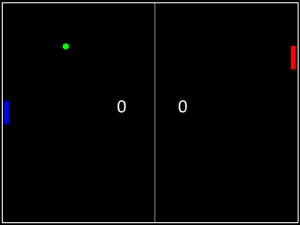

### <span style="font-size: 0.9em;">🟪</span> **Ping Pong**

#### **Create a Ping Pong game using Pygame:**

**1. Initialize Pygame:**
   * Set up the Pygame library and create the game window.

**2. Create Objects:**
   * Define the paddles, ball, and the divider line.

**3.  Handle Input:**
   * Allow player and AI control of the paddles.

**4.  Implement Ball Movement and Collision Detection:**
   * Handle the ball's movement and collisions with paddles and walls.

**5.  Display Scores:**
  * Show the current scores on the screen.

**6.  Update Game State and Render Objects Continuously:**
   * Continuously update the game state and render the objects.

##### Gameplay Details:

* The blue paddle is controlled by the player. The red paddle, controlled by the AI, moves up or down to follow the ball's vertical position.

The game will end when a player reaches the winning score.

 *  **Winning Score:** WINNING_SCORE is set to 5.
 *   **Game Over Flag:** 'game_over' is a flag to indicate whether the game has ended.
 *   **Check Winning Condition:** After updating the scores, check if either player has reached the winning score. If so, set 'game_over' to True and display the winning message.
 *  **Display Winning Message:** When 'game_over' is True, display the winner message and a prompt to restart the game.
 *  **Winning Message Color:** The color of the winning message matches the color of the winning player (BLUE for Player 1 and RED for Player 2).
 * **Restart Game:** Press 'R' to reset the scores and ball position and start a new game.
 *  **Exit Game:** Allow the user to exit the game using the 'Esc' key.

In [4]:
pygame.init()

width, height = 600, 400
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('Ping Pong')

black = (0, 0, 0)
white = (255, 255, 255)
blue = (0, 0, 255)
red = (255, 0, 0)
green = (0, 255, 0)

paddle_width, paddle_height = 10, 60
ball_size = 10

paddle1_x, paddle1_y = 10, (height // 2) - (paddle_height // 2)
paddle2_x, paddle2_y = width - 20, (height // 2) - (paddle_height // 2)

ball_x, ball_y = width // 2, height // 2
ball_speed_x, ball_speed_y = 5, 5

score1, score2 = 0, 0

winning_score = 5

small_font = pygame.font.Font('freesansbold.ttf', 20)

clock = pygame.time.Clock()

# Detect ball position within a search area
def detect_ball_position(surface, x_start, x_end):
    for y in range(height):
        for x in range(x_start, x_end):
            if surface.get_at((x, y)) == green:
                return y
    return None

running = True
game_over = False

try:
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_r and game_over:  # Restart the game
                    score1, score2 = 0, 0
                    ball_x, ball_y = width // 2, height // 2
                    ball_speed_x, ball_speed_y = 5, 5
                    game_over = False
                elif event.key == pygame.K_ESCAPE:  # Exit the game with the Esc key
                    running = False

        if not game_over:
            keys = pygame.key.get_pressed()
            if keys[pygame.K_w] and paddle1_y > 0:
                paddle1_y -= 5
            if keys[pygame.K_s] and paddle1_y < height - paddle_height:
                paddle1_y += 5
    
            # Ball movement
            ball_x += ball_speed_x
            ball_y += ball_speed_y
    
            # Ball collision with top and bottom
            if ball_y <= 0 or ball_y >= height - ball_size:
                ball_speed_y *= -1
    
            # Ball collision with paddles
            if (ball_x <= paddle1_x + paddle_width and paddle1_y < ball_y < paddle1_y + paddle_height) or (ball_x >= paddle2_x - ball_size and paddle2_y < ball_y < paddle2_y + paddle_height):
                ball_speed_x *= -1

            # Ball out of bounds
            if ball_x < 0:
                score2 += 1
                ball_x, ball_y = width // 2, height // 2
                ball_speed_x, ball_speed_y = 5, 5
            elif ball_x > width:
                score1 += 1
                ball_x, ball_y = width // 2, height // 2
                ball_speed_x, ball_speed_y = -5, 5
    
            if score1 >= winning_score:
                game_over = True
                winner_text = "Player 1 Wins!"
                winner_color = blue
            elif score2 >= winning_score:
                game_over = True
                winner_text = "Player 2 Wins!"
                winner_color = red

        screen.fill(black)
        pygame.draw.rect(screen, blue, (paddle1_x, paddle1_y, paddle_width, paddle_height))
        pygame.draw.rect(screen, red, (paddle2_x, paddle2_y, paddle_width, paddle_height))
        pygame.draw.ellipse(screen, green, (ball_x, ball_y, ball_size, ball_size))
        pygame.draw.aaline(screen, white, (width // 2, 0), (width // 2, height))
    
        score_text = small_font.render(str(score1), True, white)
        screen.blit(score_text, (width // 4, 20))
        score_text = font.render(str(score2), True, white)
        screen.blit(score_text, (width * 3 // 4, 20))
    
        if game_over:
            winner_surface = small_font.render(winner_text, True, winner_color)
            restart_surface = small_font.render("Press 'R' to Restart or 'Esc' to Exit", True, white)
            screen.blit(winner_surface, (width // 2 - winner_surface.get_width() // 2, height // 2 - winner_surface.get_height() // 2 - 20))
            screen.blit(restart_surface, (width // 2 - restart_surface.get_width() // 2, height // 2 - restart_surface.get_height() // 2 + 20))
    
        pygame.display.flip()

        # AI paddle movement
        if  ball_x > width // 2:
            detected_y = detect_ball_position(screen, width // 2, width)
            if detected_y is not None:
                if paddle2_y + paddle_height // 2 < detected_y:
                    paddle2_y += 5
                elif paddle2_y + paddle_height // 2 > detected_y:
                    paddle2_y -= 5

        clock.tick(60)

except SystemExit:
    pygame.quit()
    print("Exited the game.")
finally:
    pygame.quit()

NameError: name 'font' is not defined